In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf


In [24]:
def sample_autocovariance(h, x):
    x = np.array(x)
    h = int(np.abs(h))
    x_bar = np.mean(x)
    gamma_hat = 0
    for t in range(len(x)-h):
        gamma_hat += (x[t+h] - x_bar)*(x[t] - x_bar)
    return gamma_hat/len(x)

In [25]:
def sample_ACF(h, data):
    return sample_autocovariance(h, data)/sample_autocovariance(0, data)

In [26]:
def comp_and_draw_ACF(X, eps):
    ACF = []
    n = len(X)
    for h in range(-n+1, n):
        ACF.append(sample_ACF(h, X))

    plt.ylim(-1,1)
    plt.plot([i for i in range(0, n)], ACF[n-1:2*n], 'go-')
    plt.plot(np.zeros(n), 'b')
    plt.plot([eps for i in range(n)], 'y')
    plt.plot([-eps for i in range(n)], 'y')
    plt.title('ACF')
    plt.grid(True)
    plt.show()
    return np.array(ACF)

In [27]:
df = pd.read_excel("data.xlsx", engine = 'openpyxl')

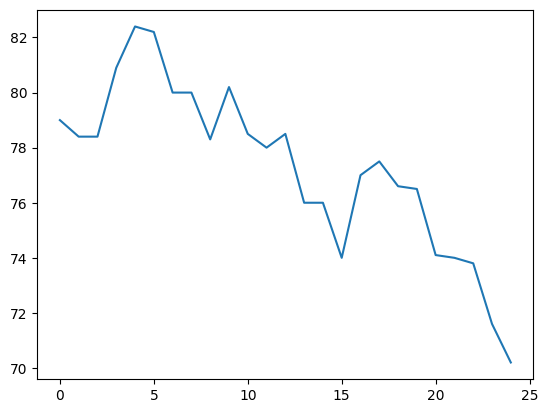

In [28]:
data = df.iloc[:,0]
n = len(data)
plt.plot(data)
plt.show()

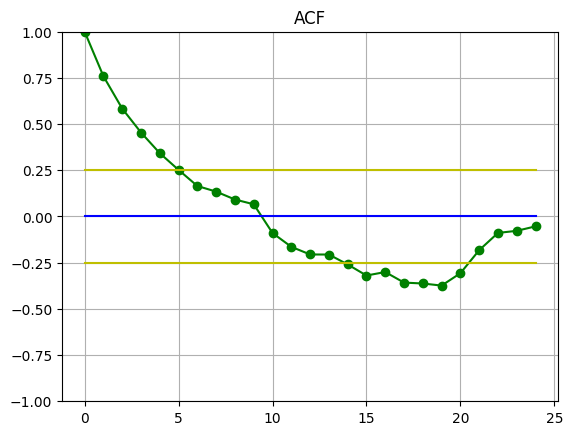

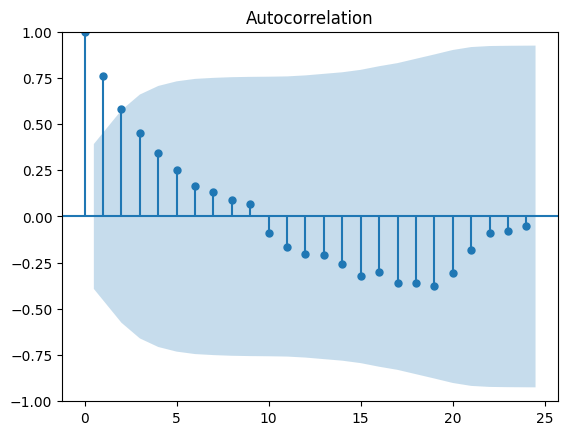

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

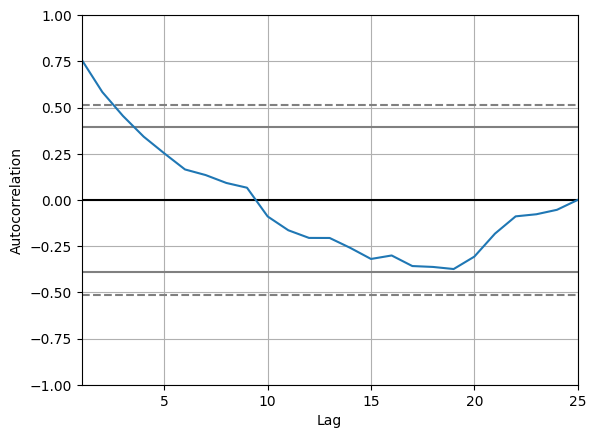

In [29]:

ACF = comp_and_draw_ACF(data, 0.25)
ax1 = plot_acf(data, lags= n - 1)
plt.show()
pd.plotting.autocorrelation_plot(data)


**$ \textbf{Moving Average Fitting} $**

In [30]:
# moving average fitting
def MA(X, q):
    W = []
    for t in range(q):
        m_t = ((q+1-t)*X[0] + sum(X[1:q+t+1]))
        W.append(m_t/(2*q+1))
    t = q
    while t + q < len(X):
        W.append(sum(X[t - q:t + q + 1]) / (2 * q + 1))
        t = t + 1
    for t in range(len(X)-q, len(X)):
        W.append((sum(X[t-q: len(X)]) + (q+t-len(X)+1)*X[len(X)-1])/(2*q+1))
    plt.plot(range(len(X)), X)
    plt.plot(range( len(X) ), W)
    #plt.plot(X - W)
    plt.show()
    return W


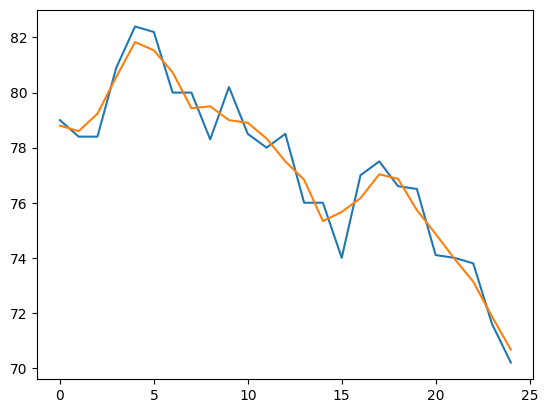

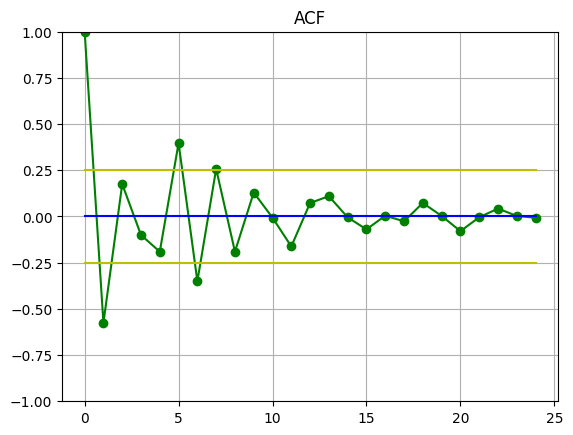

In [31]:
W = MA(data, 1)
data_extract_MA = data - W
ACF_extract_MA = comp_and_draw_ACF(data_extract_MA, 0.25)

$\textbf{Polynomial fitting}$

In [32]:
# polynomial fitting
def poly(X, order):
    coeff = np.polynomial.polynomial.polyfit(range(len(X)), X, order)
    W = []
    for i in range(len(X)):
        W.append(sum([i**j * coeff[j] for j in range(len(coeff))])) 
    plt.plot(range(len(X)), X)
    plt.plot(range(len(X)), W)
    plt.show()
    return W

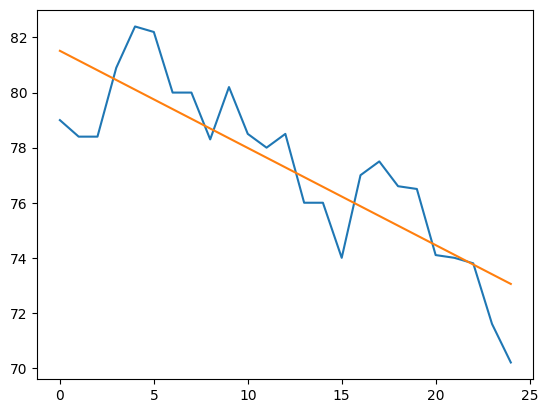

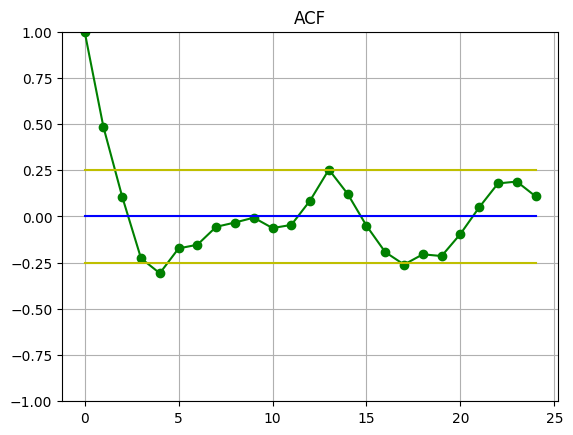

In [33]:
poly_1 = poly(data, 1)
data_extract_poly = data - poly_1
ACF_extract_poly = comp_and_draw_ACF(data_extract_poly, 0.25)

$\textbf{ES(}\alpha\textbf{)}$

In [34]:
def ES(X, alpha, plot = True):
    m = [X[0]]
    for t in range(1, len(X)):
        m.append(alpha * X[t] + (1-alpha)*m[t-1])
    if plot == True:
        plt.plot(X)
        plt.plot(m)
        plt.show()
    return np.array(m)


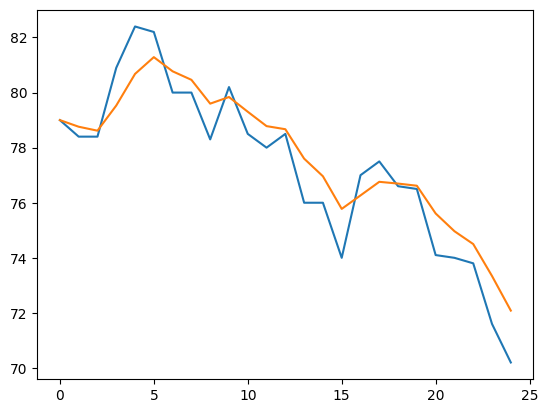

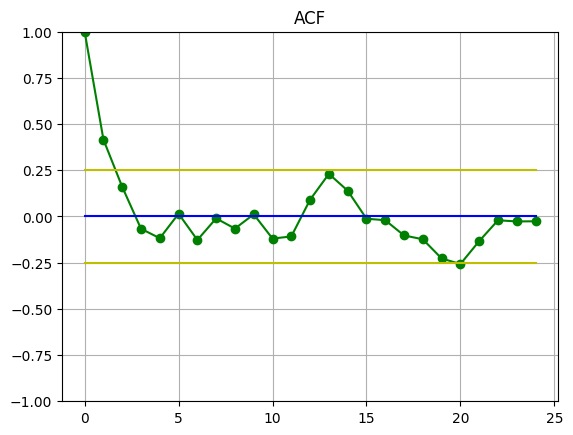

In [35]:
m = ES(data, 0.4)
data_extract_ES = data - m

ACF_extract_ES = comp_and_draw_ACF(data_extract_ES, 0.25)


**$\textbf{Holt(}\alpha, \beta \textbf{)}$**

In [36]:
def Holt(X, alpha, beta):
    L = [0]
    m = ES(X, alpha, False)
    for t in range(1, len(X)):
        L.append(beta *(m[t] - m[t-1]) + (1-beta) * L[t-1])
    F = L + m
    print("L: ", L)
    plt.plot(X)
    plt.plot(F)
    plt.show()
    return np.array(F)


L:  [0, -0.14399999999999694, -0.14400000000000204, 0.4905600000000006, 0.8851200000000028, 0.7193856000000021, -0.02104320000000276, -0.19369574400000494, -0.5966453760000016, -0.09415839743999901, -0.3589635072000027, -0.4563654918143927, -0.2502142500863972, -0.740686532050948, -0.6806351120302128, -0.9828703443379834, -0.09951791745072902, 0.25637096519038355, 0.0642552653785623, -0.0212737662671318, -0.6126950299579914, -0.6315893260538734, -0.5325425188639612, -0.9089610806110238, -1.1171508760836795]


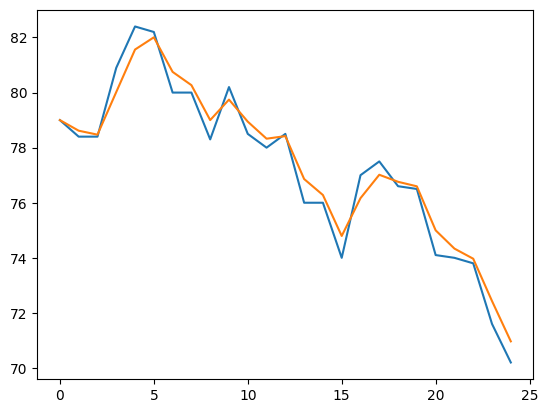

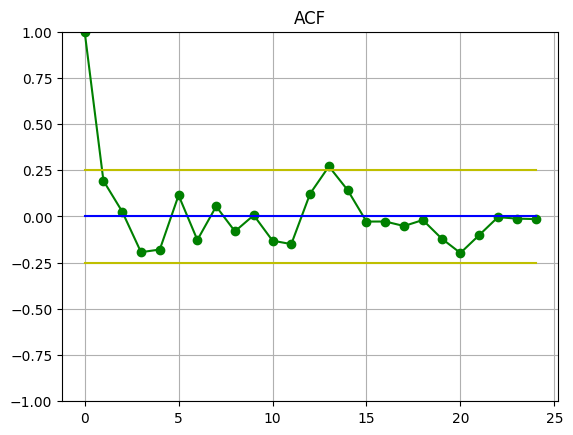

In [37]:
F = Holt(data, 0.4, 0.6)
data_extract_Holt = data - F
ACF_extract_Hplt = comp_and_draw_ACF(data_extract_Holt, 0.25)

In [38]:
def MA_left(X, q):
    m = []
    for t in range(q+1):
        m.append((sum(X[1:t+1]) + (q-t+1)*X[0])/(q+1))
    for t in range(q+1, len(X)):
        m.append((sum(X[t-q:t+1]))/(q+1))
    return np.array(m)
    